In [1]:
%load_ext autoreload
%load_ext autotime

time: 170 µs (started: 2023-11-01 20:18:17 -07:00)


In [2]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from main import DFAnalyzer, setup_dask_cluster, setup_logging, update_dft_configuration, get_dft_configuration
from plots import DFAnalyzerPlots

plt.style.use('seaborn-v0_8-poster')
warnings.filterwarnings('ignore')

time: 1.7 s (started: 2023-11-01 20:18:17 -07:00)


In [3]:
update_dft_configuration(
    debug=False,
    skip_hostname=True,
    time_approximate=True,
    time_granularity=30e6,
    # time_granularity=80e6,
    verbose=True,
    workers=48,
)

setup_logging()

time: 1.79 ms (started: 2023-11-01 20:18:20 -07:00)


In [4]:
%autoreload 2

setup_dask_cluster()

[INFO] [20:18:24] Initialized Client with 48 workers and link http://127.0.0.1:8787/status [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:620]


time: 3.28 s (started: 2023-11-01 20:18:20 -07:00)


In [5]:
get_df_configuration().time_granularity

30000000.0

time: 6.04 ms (started: 2023-11-01 20:18:25 -07:00)


In [6]:
%autoreload 2

trace_path = '/usr/workspace/iopp/kogiou1/dlio_benchmark_logs/unet3d/node_32_ppn_4/.trace*.pfw.gz'
# trace_path = '/usr/workspace/iopp/dlio_paper_results/resnet_50_1node_4ppn/*.pfw.gz'
# trace_path = '/usr/WS2/iopp/kogiou1/dlio_benchmark/hydra_log/cosmoflow/2023-10-31-10-27-24/.trace*.pfw.gz'
# trace_path = '/usr/workspace/iopp/df_traces/mummi-5-node/trace*.pfw.gz'
# trace_path = '/usr/workspace/iopp/df_traces/deep_speed_32_4ppn/*.pfw.gz'

analyzer = DFAnalyzer(trace_path)
analyzer

[INFO] [20:18:27] Created index for 128 files [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:330]
[INFO] [20:18:27] Total size of all files are <dask.bag.core.Item object at 0x1555204f1b80> bytes [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:332]
[INFO] [20:18:27] Loading 768 batches out of 128 files and has 11996460 lines overall [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:345]
[INFO] [20:18:39] Loaded events [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:381]
[INFO] [20:18:39] Loaded plots with slope threshold: 45 [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:387]


time: 13.2 s (started: 2023-11-01 20:18:26 -07:00)


In [7]:
analyzer.events.head()

,name,cat,pid,tid,ts,te,dur,tinterval,trange,hostname,compute_time,io_time,app_io_time,total_time,filename,phase,size
0,TorchFramework.__init__,ai_framework,0,338684,6525218,6525226,8,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
1,TorchFramework.is_nativeio_available,ai_framework,0,338684,6525253,6525254,1,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
2,FileStorage.__init__,storage,0,338684,319979,6525269,6205290,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
3,FileStorage.create_namespace,storage,0,338684,6525298,6525325,27,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>
4,DLIOBenchmark.__init__,dlio_benchmark,0,338684,319960,7804533,7484573,<NA>,0.0,ruby165,<NA>,<NA>,<NA>,0,<NA>,0,<NA>


time: 43.9 ms (started: 2023-11-01 20:18:41 -07:00)


In [8]:
analyzer.summary()

[INFO] [20:18:41] Total number of events in the workload are 11996204 [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:479]
[INFO] [20:18:43] Approximate True 105531169, 52405603, 102291312, 81010188,                2326962, 52212671, 22261296, 43542420 [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:433]
[INFO] [20:18:44] List after removing numbers ['/p/lustreX/kogiouX/dlio_benchmark_results/unetXd/valid', '/p/lustreX/kogiouX/dlio_benchmark_results/unetXd/train/img_XXX_of_XXX.npz', '/p/lustreX/kogiouX/dlio_benchmark_results/unetXd/train', '<NA>'] [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:474]
[INFO] [20:18:44] Created an interval of [0,127] [/g/g91/izzet/projects/dftracer/dlp_analyzer/main.py:445]


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  Allocation    Scheduler Allocation Details                                                                     │
│                ├── Nodes: 32 ['ruby165', 'ruby926', 'ruby933', 'ruby1025', 'ruby204', 'ruby1049', 'ruby1075',   │
│                │   'ruby1203', 'ruby1253', 'ruby305', 'ruby340', 'ruby344', 'ruby350', 'ruby450', 'ruby459',    │
│                │   'ruby471', 'ruby477', 'ruby480', 'ruby527', 'ruby188', 'ruby659', 'ruby673', 'ruby714',      │
│                │   'ruby716', 'ruby747', 'ruby754', 'ruby756', 'ruby778', 'ruby786', 'ruby809', 'ruby811',      │
│                │   'ruby815']                                                                                   │
│                ├── Processes: 128 [0,127]                                                                       │
│                ├── Thread allocations across nodes (includes dynamically created threads)                       │
│                │   ├── Compute: 128                                                                             │
│                │   └── I/O: 2304                                                                                │
│                └── Events Recorded: 11996204                                                                    │
│  Dataset       Description of Dataset Used                                                                      │
│                └── Files: 171 ['/p/lustreX/kogiouX/dlio_benchmark_results/unetXd/valid',                        │
│                    '/p/lustreX/kogiouX/dlio_benchmark_results/unetXd/train/img_XXX_of_XXX.npz',                 │
│                    '/p/lustreX/kogiouX/dlio_benchmark_results/unetXd/train', '<NA>']                            │
│  I/O Behavior  Behavior of Application                                                                          │
│                ├── Split of Time in application                                                                 │
│                │   ├── Total Time: 105.531 sec                                                                  │
│                │   ├── Overall App Level I/O: 81.010 sec                                                        │
│                │   ├── Unoverlapped App I/O: 22.261 sec                                                         │
│                │   ├── Unoverlapped App Compute: 43.542 sec                                                     │
│                │   ├── Compute: 102.291 sec                                                                     │
│                │   ├── Overall I/O: 52.406 sec                                                                  │
│                │   ├── Unoverlapped I/O: 2.327 sec                                                              │
│                │   └── Unoverlapped Compute: 52.213 sec                                                         │
│                ├── Transfer size distribution by function                                                       │
│                │   ├── Function       |min   |25    |mean  |median|75    |max   |                               │
│                │   ├── opendir        |NA    |nan   |nan   |NA    |nan   |NA    |                               │
│                │   ├── __xstat64      |NA    |nan   |nan   |NA    |nan   |NA    |                               │
│                │   ├── open64         |NA    |nan   |nan   |NA    |nan   |NA    |                               │
│                │   ├── __fxstat64     |NA    |nan   |nan   |NA    |nan   |NA    |                               │
│                │   ├── lseek64        |NA    |nan   |nan   |NA    |nan   |NA    |                               │
│                │   ├── read           |NA    |4MB   |4MB   |4MB   |4MB   |4MB   |                               │
│                │   └── close          |NA    |nan   |n

time: 2.85 s (started: 2023-11-01 20:18:41 -07:00)


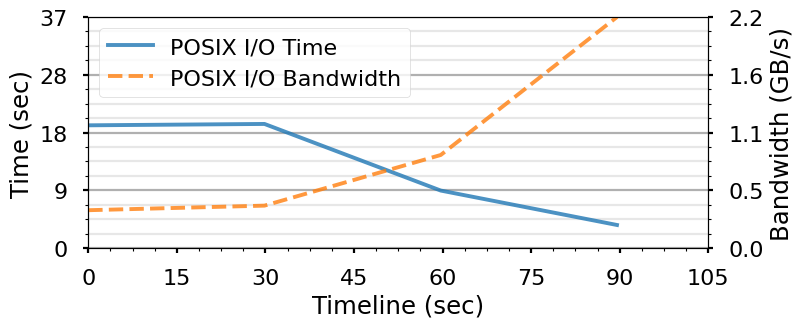

time: 2.87 s (started: 2023-11-01 20:18:50 -07:00)


In [9]:
fig, ax1, ax2 = analyzer.plots.time_bw_timeline(
    bw_unit='gb',
    figsize=(8, 3),
    line1_label='POSIX I/O Time',
    line2_label='POSIX I/O Bandwidth',
    time_col='io_time',
    x_num_ticks=8,
    y_num_ticks=5,
)

In [ ]:
fig.savefig('posix_io_time.pdf', format='pdf', bbox_inches='tight')

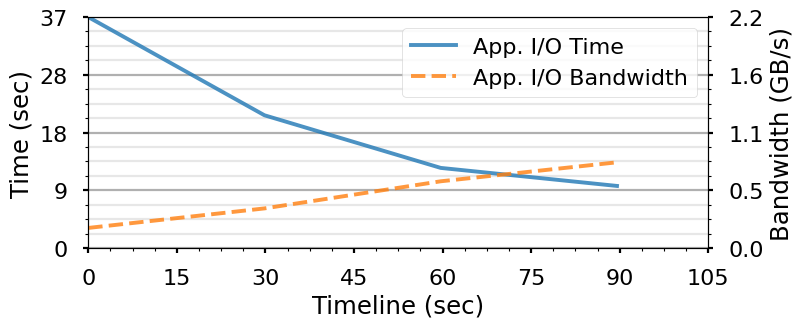

time: 2.22 s (started: 2023-11-01 20:19:02 -07:00)


In [10]:
fig, ax1, ax2 = analyzer.plots.time_bw_timeline(
    bw_unit='gb',
    figsize=(8, 3),
    line1_label='App. I/O Time',
    line2_label='App. I/O Bandwidth',
    time_col='app_io_time',
    x_num_ticks=8,
    y_num_ticks=5,
)

In [ ]:
fig.savefig('app_io_time.pdf', format='pdf', bbox_inches='tight')

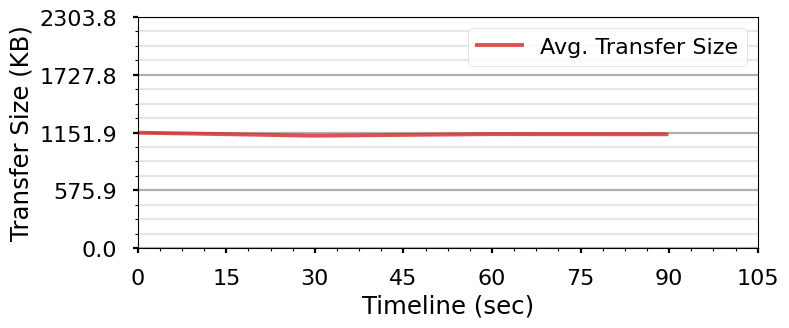

time: 2.06 s (started: 2023-11-01 20:19:16 -07:00)


In [11]:
fig, ax = analyzer.plots.xfer_size_timeline(
    figsize=(8, 3),
    unit='kb',
    x_num_ticks=8,
)

In [12]:
fig.savefig('xfer_size.pdf', format='pdf', bbox_inches='tight')

time: 1.4 s (started: 2023-11-01 20:19:24 -07:00)
